In [1]:
import numpy as np
import pandas as pd

from GP_Variational import GP_Var_regression, plot_gp
np.random.seed(36)

In [2]:
# Load simple dataset from www.gatsby.ucl.ac.uk/∼snelson/ 
# 1D 200 inputs points, 300 test points
trainset = pd.read_csv("1D_train.csv").to_numpy()

testset = pd.read_csv("1D_test.csv").to_numpy()

# Get the X and Y
X_train = np.expand_dims(trainset[:,0],axis=1)
Y_train = np.expand_dims(trainset[:,1],axis=1)
X_test =  np.expand_dims(testset[:,0],axis=1)

In [3]:
GP = GP_Var_regression()
theta0 = np.array([1.0,1.0])
noise0 = np.array([0.3])
GP.fit(X_train, Y_train, params0=np.concatenate([theta0,noise0]), expected_m=15, len_working_set=50, noise_estimation=True)

Optimization terminated successfully.
         Current function value: 194.579155
         Iterations: 20
         Function evaluations: 108
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 182.304192
         Iterations: 23
         Function evaluations: 212
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 161.266227
         Iterations: 24
         Function evaluations: 144
         Gradient evaluations: 36
         Current function value: 201.734012
         Iterations: 9
         Function evaluations: 200
         Gradient evaluations: 47
         Current function value: 160.342988
         Iterations: 35
         Function evaluations: 344
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 128.238361
         Iterations: 16
         Function evaluations: 124
         Gradient evaluations: 31
Optimization terminated suc

In [4]:
print("Length: ", GP.theta[0], ", Scale: ", GP.theta[1], ", Noise: ", GP.noise)

Length:  0.6162761745872098 , Scale:  0.8825011970811097 , Noise:  0.28243811077838


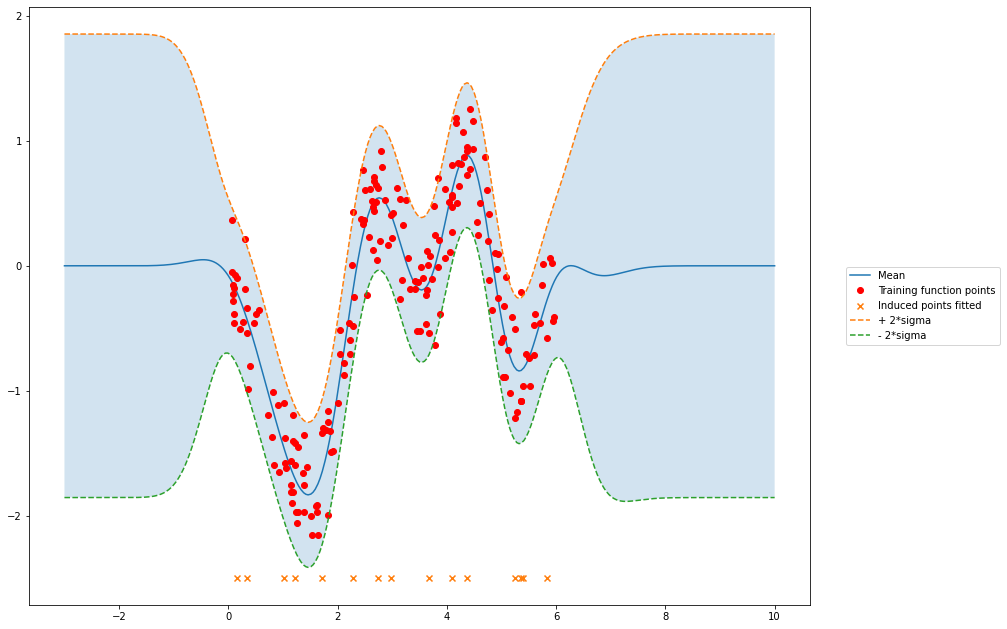

In [5]:
mu_s, cov_s = GP.predict(X_test, X_train, GP.X_induced, Y_train, theta=GP.theta, noise=GP.noise)

plot_gp(mu_s, cov_s, X_test, GP.X_induced, X_train=X_train, Y_train=Y_train)


# With different training size

## n = 20, m = 15

In [6]:
sorted_idx = np.argsort(X_train.flatten())
n = X_train.shape[0]
X_train_sorted = X_train[sorted_idx]
Y_train_sorted = Y_train[sorted_idx]

X_train_20 = X_train_sorted[np.arange(1,n,10)]

Y_train_20 = Y_train_sorted[np.arange(1,n,10)]

In [7]:
theta0 = np.array([1.0,1.0])
noise0 = np.array([0.3])

GP = GP_Var_regression()
GP.fit(X_train_20, Y_train_20, params0=np.concatenate([theta0,noise0]), expected_m=15, len_working_set=50, noise_estimation=True)
print("Noise:",GP.noise, "| (length,scale):",GP.theta)

Optimization terminated successfully.
         Current function value: 25.447681
         Iterations: 16
         Function evaluations: 80
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 24.732663
         Iterations: 14
         Function evaluations: 80
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 23.445675
         Iterations: 13
         Function evaluations: 76
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 22.575866
         Iterations: 13
         Function evaluations: 84
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 21.687485
         Iterations: 19
         Function evaluations: 112
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 20.473318
         Iterations: 12
         Function evaluations

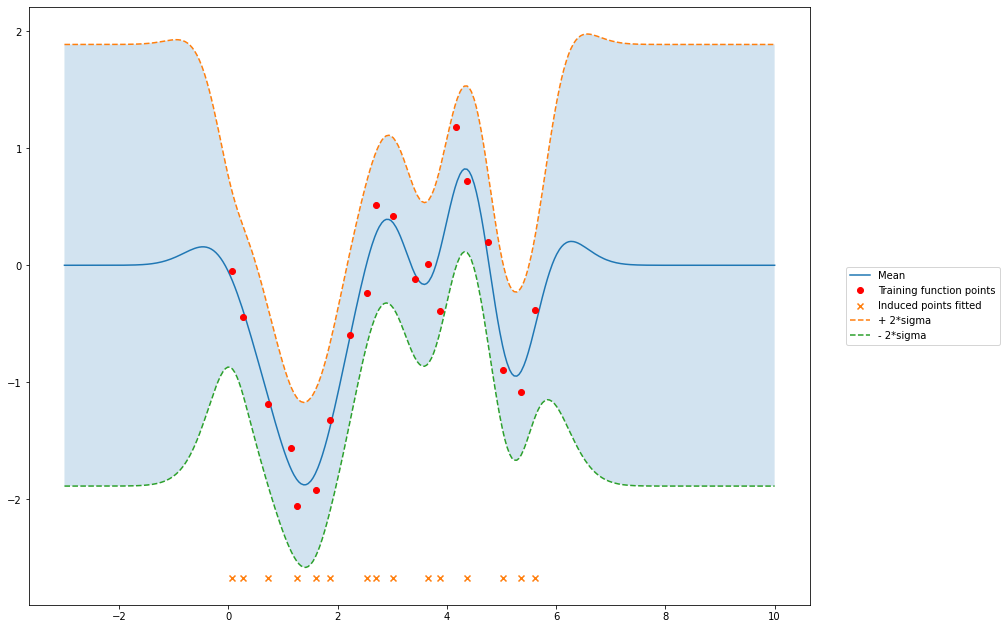

In [8]:
mu_s, cov_s = GP.predict(X_test, X_train_20, GP.X_induced, Y_train_20, theta=GP.theta, noise=GP.noise)

plot_gp(mu_s, cov_s, X_test, GP.X_induced, X_train=X_train_20, Y_train=Y_train_20)
